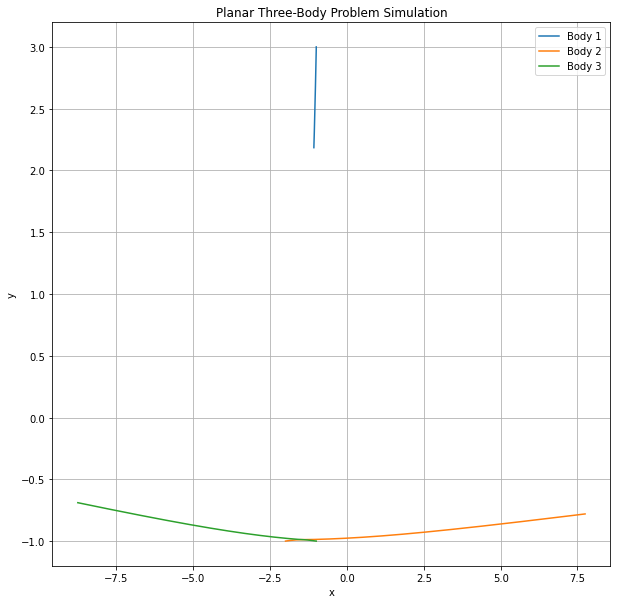

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Gravitational constant
G = 1.0  # Using normalized units

# Masses of the bodies
m1, m2, m3 = 3, 4, 5

# Initial positions and velocities (in Cartesian coordinates)
# Positions: (x, y)
r1 = np.array([-1, 3])
r2 = np.array([-2, -1])
r3 = np.array([-1, -1])

# Velocities: (vx, vy)
v1 = np.array([0.006203685, 0.00236573])
v2 = np.array([0.006203685, 0.00236573])
v3 = -2 * v1  # Ensuring momentum conservation

# State vector: [r1x, r1y, r2x, r2y, r3x, r3y, v1x, v1y, v2x, v2y, v3x, v3y]
state = np.array([*r1, *r2, *r3, *v1, *v2, *v3])

# Function to compute the derivatives of the state vector
def derivatives(state):
    r1 = state[:2]
    r2 = state[2:4]
    r3 = state[4:6]
    v1 = state[6:8]
    v2 = state[8:10]
    v3 = state[10:12]
    
    # Compute distances
    r12 = np.linalg.norm(r2 - r1)
    r13 = np.linalg.norm(r3 - r1)
    r23 = np.linalg.norm(r3 - r2)
    
    # Compute accelerations
    a1 = G * m2 * (r2 - r1) / r12**3 + G * m3 * (r3 - r1) / r13**3
    a2 = G * m1 * (r1 - r2) / r12**3 + G * m3 * (r3 - r2) / r23**3
    a3 = G * m1 * (r1 - r3) / r13**3 + G * m2 * (r2 - r3) / r23**3
    
    return np.array([*v1, *v2, *v3, *a1, *a2, *a3])

# RK4 integration step
def rk4_step(state, dt):
    k1 = derivatives(state)
    k2 = derivatives(state + 0.5 * dt * k1)
    k3 = derivatives(state + 0.5 * dt * k2)
    k4 = derivatives(state + dt * k3)
    return state + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

# Simulation parameters
dt = 0.01
num_steps = 200

# Arrays to store the trajectories
trajectory1 = np.zeros((num_steps, 2))
trajectory2 = np.zeros((num_steps, 2))
trajectory3 = np.zeros((num_steps, 2))

# Simulation loop
for i in range(num_steps):
    trajectory1[i] = state[:2]
    trajectory2[i] = state[2:4]
    trajectory3[i] = state[4:6]
    state = rk4_step(state, dt)

# Plotting the results
plt.figure(figsize=(10, 10))
plt.plot(trajectory1[:, 0], trajectory1[:, 1], label='Body 1')
plt.plot(trajectory2[:, 0], trajectory2[:, 1], label='Body 2')
plt.plot(trajectory3[:, 0], trajectory3[:, 1], label='Body 3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Planar Three-Body Problem Simulation')
plt.grid()
plt.show()
